In [29]:
# Import Libraries
import pandas as pd # Library for data manipulation and analysis
import numpy as np # Library for numerical operations
import matplotlib.pyplot as plt # Library for data visualization
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Standardizes numerical features and converts categorical feature
from sklearn.decomposition import PCA # Reduces the number of features 
from sklearn.cluster import KMeans # Group similar data points into k clusters
from sklearn.metrics import silhouette_score # Measures how well datas fit within their assigned clusters

In [31]:
# Load the datasets
product_offering_df = pd.read_csv("/Users/gillianmondero/cleaned_product_offering_data.csv")
customer_transactions_df = pd.read_csv("/Users/gillianmondero/feature_engineered_transactions.csv")
customer_feedback_df = pd.read_csv("/Users/gillianmondero/feature_engineered_feedback.csv")

# Display the first few rows of each dataset
product_offering_df.head(), customer_transactions_df.head(), customer_feedback_df.head()

(   Product_ID                   Product_Name  Product_Type_Credit Card  \
 0           1           Platinum Credit Card                      True   
 1           2           Gold Savings Account                     False   
 2           3  High-Yield Investment Account                     False   
 3           4                  Mortgage Loan                     False   
 4           5                      Auto Loan                     False   
 
    Product_Type_Investment  Product_Type_Loan  Product_Type_Savings Account  \
 0                    False              False                         False   
 1                    False              False                          True   
 2                     True              False                         False   
 3                    False               True                         False   
 4                    False               True                         False   
 
    Risk_Level_High  Risk_Level_Low  Risk_Level_Medium  \
 0      

In [33]:
# Merge customer transactions with customer feedback using Customer_ID
merged_df = customer_transactions_df.merge(customer_feedback_df, on="Customer_ID", how="left")

# Display the merged dataset 
print("Merged Transactions and Feedback:")
print(merged_df)  

Merged Transactions and Feedback:
      Customer_ID  Recency  Frequency_x  Monetary_Value  \
0               1     26.0          6.0         16836.0   
1               1     26.0          6.0         16836.0   
2               2     67.0          2.0          4907.0   
3               2     67.0          2.0          4907.0   
4               2     67.0          2.0          4907.0   
...           ...      ...          ...             ...   
4135          999     14.0          9.0         23962.0   
4136          999     14.0          9.0         23962.0   
4137         1000     37.0          6.0          9652.0   
4138         1000     37.0          6.0          9652.0   
4139         1000     37.0          6.0          9652.0   

      Transaction_Amount_Variability  Days_Since_First_Transaction  \
0                           0.670928                         180.0   
1                           0.670928                         180.0   
2                           0.161606           

In [35]:
# Drop unnecessary column
merged_df.drop(columns=["Customer_ID"], inplace=True)
print("DataFrame after dropping unnecessary column:")
print(merged_df.head())

DataFrame after dropping unnecessary column:
   Recency  Frequency_x  Monetary_Value  Transaction_Amount_Variability  \
0     26.0          6.0         16836.0                        0.670928   
1     26.0          6.0         16836.0                        0.670928   
2     67.0          2.0          4907.0                        0.161606   
3     67.0          2.0          4907.0                        0.161606   
4     67.0          2.0          4907.0                        0.161606   

   Days_Since_First_Transaction  Avg_Transaction_Gap  Is_Weekend  \
0                         180.0                 30.0    0.166667   
1                         180.0                 30.0    0.166667   
2                         104.0                 52.0    0.500000   
3                         104.0                 52.0    0.500000   
4                         104.0                 52.0    0.500000   

   Frequent_Large_Spender  Frequency_y  Satisfaction_Variability  \
0                     0.0  

In [37]:
# Separate numerical and categorical features
num_features = merged_df.select_dtypes(include=['number']).columns
cat_features = merged_df.select_dtypes(include=['object']).columns
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: Index(['Recency', 'Frequency_x', 'Monetary_Value',
       'Transaction_Amount_Variability', 'Days_Since_First_Transaction',
       'Avg_Transaction_Gap', 'Is_Weekend', 'Frequent_Large_Spender',
       'Frequency_y', 'Satisfaction_Variability', 'Monetary_Engagement'],
      dtype='object')
Categorical Features: Index(['Satisfaction_Category', 'Recommendation_Category'], dtype='object')


In [39]:
# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df[num_features])
print("Scaled Numerical Features:")
print(scaled_features[:5])

Scaled Numerical Features:
[[-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611]
 [-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012]]


In [41]:
# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(merged_df[cat_features])
print("Encoded Categorical Features:")
print(encoded_categorical[:5])

Encoded Categorical Features:
[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]]


In [43]:
# Combine processed features
final_dataset = np.hstack([scaled_features, encoded_categorical])
print("Final Combined Dataset:")
print(final_dataset[:5])

Final Combined Dataset:
[[-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611  0.
   0.          0.          0.          0.          0.        ]
 [-0.34270167  0.44057672  0.6728921   0.77322704  1.00284131  0.19814291
  -0.52574324 -0.31281309 -1.81551537 -1.71671578  2.32538611  1.
   0.          0.          0.          0.          0.        ]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012  0.
   0.          1.          0.          1.          0.        ]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012  1.
   0.          0.          0.          0.          1.        ]
 [ 0.78666291 -1.37886231 -1.1780829  -1.44418376 -0.49348107  1.84309621
   0.95072573 -0.31281309 -1.31235339 -0.06941377 -1.06346012  0.
   0.          1.       

In [45]:
# Apply PCA to reduce dimensionality (keeping 95% variance)
pca = PCA(n_components=0.95)
final_dataset_pca = pca.fit_transform(final_dataset)
print("Final Dataset after PCA:")
print(final_dataset_pca[:5])

Final Dataset after PCA:
[[ 1.43517639  1.24308424 -2.81689632 -0.79351569 -1.12494948  0.41406253
   0.04701354  0.19559373  0.76597714 -0.17811656  0.18876216 -0.05164181]
 [ 1.43715742  1.26496566 -2.85051633 -0.79801233 -1.1112113   0.41666512
   0.03006324  0.15581572  0.65535089 -0.18389794 -0.49947988 -0.56440078]
 [-1.97107877  1.33565286  0.90664965  1.05210294 -0.44321471  1.94691811
  -0.91192346  0.94162783 -0.23099677  0.75452601  0.58705364 -0.36455969]
 [-1.96288197  1.40411889  0.77240319  1.03063075 -0.40160321  1.92577153
  -0.97280833  0.87748067 -0.51539826 -0.6585683  -0.76823805 -0.43691012]
 [-1.97387672  1.33825089  0.91644594  1.04326174 -0.46223502  1.95204329
  -0.94484641  0.94101945 -0.4101337  -0.64507981  0.61824716 -0.37005164]]


In [47]:
# Finding optimal K using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_dataset_pca)
    inertia.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_}")

# Debugging print to ensure inertia is correctly populated
print("Final Inertia Values:", inertia)

K=1, Inertia=48349.75092077571
K=2, Inertia=41054.05883922508
K=3, Inertia=36431.39387718436
K=4, Inertia=33108.47128751722
K=5, Inertia=30560.82357496228
K=6, Inertia=29084.075564691906
K=7, Inertia=27931.104393522983
K=8, Inertia=26865.328970756294
K=9, Inertia=26049.882922788973
K=10, Inertia=25226.14382804555
Final Inertia Values: [48349.75092077571, 41054.05883922508, 36431.39387718436, 33108.47128751722, 30560.82357496228, 29084.075564691906, 27931.104393522983, 26865.328970756294, 26049.882922788973, 25226.14382804555]


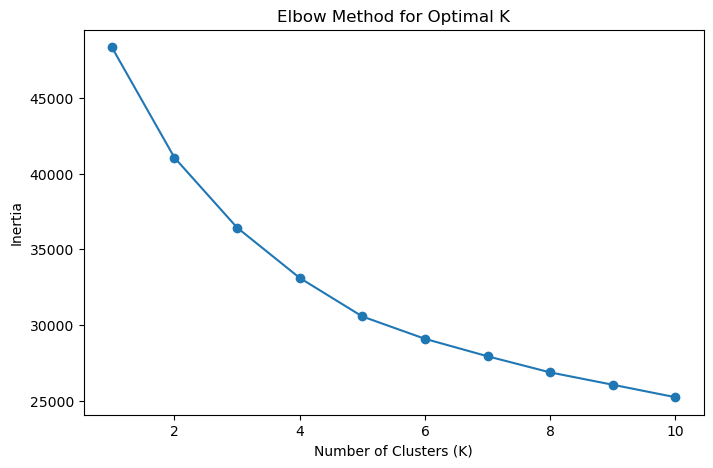

In [48]:
# Fix potential shape mismatch issue
if len(inertia) == len(K_range):
    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()
else:
    print("Error: Mismatch in lengths of K_range and inertia. Debug needed.")

In [49]:
# Evaluate silhouette scores for K=3 and K=4
k_values = [3, 4]
cluster_results = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(final_dataset_pca)
    silhouette = silhouette_score(final_dataset_pca, clusters)
    cluster_results[k] = silhouette
    print(f"K={k}, Silhouette Score={silhouette}")

K=3, Silhouette Score=0.12832163052917284
K=4, Silhouette Score=0.14512224784059605


In [50]:
# Select best K based on silhouette score
best_k = max(cluster_results, key=cluster_results.get)
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_clusters = best_kmeans.fit_predict(final_dataset_pca)
print(f"Best K={best_k}, Final Clusters Assigned:")
print(final_clusters[:10])

Best K=4, Final Clusters Assigned:
[0 0 2 2 2 1 1 1 2 2]


In [51]:
# Add clusters to the original dataset
merged_df["Cluster"] = final_clusters

# Display the clustered dataset
print("\nClustered Customer Segments:")
print(merged_df)


Clustered Customer Segments:
      Recency  Frequency_x  Monetary_Value  Transaction_Amount_Variability  \
0        26.0          6.0         16836.0                        0.670928   
1        26.0          6.0         16836.0                        0.670928   
2        67.0          2.0          4907.0                        0.161606   
3        67.0          2.0          4907.0                        0.161606   
4        67.0          2.0          4907.0                        0.161606   
...       ...          ...             ...                             ...   
4135     14.0          9.0         23962.0                        0.446405   
4136     14.0          9.0         23962.0                        0.446405   
4137     37.0          6.0          9652.0                        0.450036   
4138     37.0          6.0          9652.0                        0.450036   
4139     37.0          6.0          9652.0                        0.450036   

      Days_Since_First_Transactio